In [6]:
cd /home/nakedmoleratvoices/Mole\ rats\ reborn/CodeRefactoredFinal/

/home/nakedmoleratvoices/Mole rats reborn/CodeRefactoredFinal


In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tracing_model.image_and_trace_processing import *
from tracing_model.segmentator_training import *

%matplotlib inline

def rgb2gray(rgb):
    """ Transforms image from RGB to grayscale """
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray


### Loading data

In [8]:
paths = ['/home/nakedmoleratvoices/Mole rats reborn/datasets/traced_softchirps/SC manual1/',
         '/home/nakedmoleratvoices/Mole rats reborn/datasets/traced_softchirps/SC manual2/']

In [9]:
images = []
traces = []

for p in paths:
    for ratid in os.listdir(p):
        names  = [n[:-4] for n in os.listdir(p + ratid) if '.txt' in n]
        for n in names:
            
            im = rgb2gray(plt.imread(p + ratid + '/%s.png' % n))
            
            trace = np.zeros(im.shape)
            txt = np.loadtxt(p + ratid + '/%s.txt' % n, dtype = 'int')[:, [1, 0]]
            inds_to_delete = np.where((txt[:, 0] >= im.shape[0]) + (txt[:, 1] >= im.shape[1]))[0]
            txt = np.delete(txt, inds_to_delete, 0)
            trace[tuple(txt.T)] = 1
            
            images.append(im)
            traces.append(trace)
            
X = np.array(images)
y = np.array(traces)

### Augmenting and processing data

In [10]:
test_ratio = 0.05
times_augment = 7


In [11]:
size_test = int(len(images) * test_ratio)

all_inds = np.arange(0, len(X))
np.random.shuffle(all_inds)
test_indexes = all_inds[ : size_test]
train_indexes = all_inds[ size_test : ]

X_train = X[train_indexes]
y_train = y[train_indexes]
X_test = X[test_indexes]
y_test = y[test_indexes]
y_test = np.array([binarize_trace(trace) for trace in y_test])

In [12]:

X_train_aug = []
y_train_aug = []
for _ in range(times_augment):
    for im, trace in zip(X_train, y_train):
        im_aug, trace_aug = augment_im_and_trace(im, trace)
        trace_aug = binarize_trace(trace_aug)
        X_train_aug.append(im_aug)
        y_train_aug.append(trace_aug)

X_train_aug = np.array(X_train_aug)
y_train_aug = np.array(y_train_aug)

y_train_aug[y_train_aug > 0] = 1
y_train_aug[y_train_aug > 0] = 1

/home/nakedmoleratvoices/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/nakedmoleratvoices/.local/lib/python3.5/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


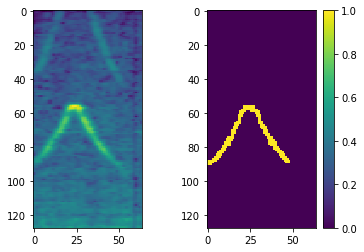

In [12]:
ind = np.random.randint(0, len(X_train_aug))
plt.subplot(121)
plt.imshow(X_train_aug[ind])
plt.subplot(122)
plt.imshow(y_train_aug[ind])
plt.colorbar()

### Model design

In [14]:
def load_model(name = 'segmentator3000',
               path = '/home/nakedmoleratvoices/Mole rats reborn/CodeRefactoredFinal/tracing_model/'):
    
    """ Tries to load model"""
    
    if name in os.listdir(path):
        model = tf.keras.models.load_model(path + name)
        print('Succesfully loaded model')
    else:
        print('Model was not found')
    return model

In [16]:
#model = create_autoencoder(X_train[0].shape)
model = load_model('segmentator3000')

Succesfully loaded model


In [15]:
model.fit(X_train.reshape((*X_train.shape, 1)), y_train, batch_size = 32, epochs = 500, 
          validation_data = (X_test, y_test))

Epoch 1/500
17/17 [==============================] - 19s 1s/step - loss: 0.0163 - val_loss: 0.0100
Epoch 2/500
17/17 [==============================] - 19s 1s/step - loss: 0.0100 - val_loss: 0.0101
Epoch 3/500
17/17 [==============================] - 19s 1s/step - loss: 0.0101 - val_loss: 0.0100
Epoch 4/500
17/17 [==============================] - 19s 1s/step - loss: 0.0099 - val_loss: 0.0097
Epoch 5/500
17/17 [==============================] - 19s 1s/step - loss: 0.0097 - val_loss: 0.0101
Epoch 6/500
17/17 [==============================] - 19s 1s/step - loss: 0.0101 - val_loss: 0.0100
Epoch 7/500
17/17 [==============================] - 19s 1s/step - loss: 0.0103 - val_loss: 0.0101
Epoch 8/500
17/17 [==============================] - 19s 1s/step - loss: 0.0101 - val_loss: 0.0101
Epoch 9/500
17/17 [==============================] - 19s 1s/step - loss: 0.0101 - val_loss: 0.0101
Epoch 10/500
17/17 [==============================] - 19s 1s/step - loss: 0.0100 - val_loss: 0.0100
Epoch 11/

17/17 [==============================] - 19s 1s/step - loss: 0.0049 - val_loss: 0.0057
Epoch 84/500
17/17 [==============================] - 19s 1s/step - loss: 0.0048 - val_loss: 0.0058
Epoch 85/500
17/17 [==============================] - 19s 1s/step - loss: 0.0050 - val_loss: 0.0057
Epoch 86/500
17/17 [==============================] - 19s 1s/step - loss: 0.0049 - val_loss: 0.0058
Epoch 87/500
17/17 [==============================] - 19s 1s/step - loss: 0.0048 - val_loss: 0.0059
Epoch 88/500
17/17 [==============================] - 19s 1s/step - loss: 0.0049 - val_loss: 0.0059
Epoch 89/500
17/17 [==============================] - 19s 1s/step - loss: 0.0049 - val_loss: 0.0059
Epoch 90/500
17/17 [==============================] - 19s 1s/step - loss: 0.0048 - val_loss: 0.0058
Epoch 91/500
17/17 [==============================] - 19s 1s/step - loss: 0.0049 - val_loss: 0.0058
Epoch 92/500
17/17 [==============================] - 19s 1s/step - loss: 0.0048 - val_loss: 0.0059
Epoch 93/500


17/17 [==============================] - 19s 1s/step - loss: 0.0028 - val_loss: 0.0067
Epoch 246/500
12/17 [====================>.........] - ETA: 5s - loss: 0.0028

KeyboardInterrupt: 

In [19]:
model.save('/home/nakedmoleratvoices/Mole rats reborn/CodeRefactoredFinal/tracing_model/segmentator3000')

INFO:tensorflow:Assets written to: /home/nakedmoleratvoices/Mole rats reborn/CodeRefactoredFinal/tracing_model/segmentator3000/assets


### Checking results

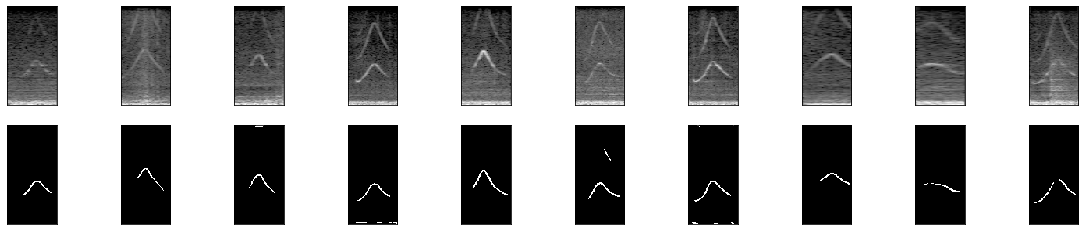

In [22]:

n = 10

inds = np.arange(0, len(X_test))
np.random.shuffle(inds)
pred = predict_with_augmentation(X_test[inds[:n]], model, th = 0.35, times_augment = 50)

plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(X_test[inds[i - 1]])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(pred[i - 1] >= .2)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()